In [1]:
import sys
sys.path.append("C:/Users/E1005279/OneDrive - Sanlam Life Insurance Limited/MWL/MWLrepo/MiWayLife2/Data_Analysis_Package")
from data_preparation import DataPreparation, Analysis, multi_data_ops
import data_operations as do

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

import data_transforations as data_tr
path="C:/Users/E1005279/OneDrive - Sanlam Life Insurance Limited/MWL/Lapse Rate Projections/Data/Data2/"

In [2]:
from datetime import datetime
from dateutil import rrule

In [10]:
data=pd.DataFrame(pd.read_csv(path+"inception_data.csv"))
data=data.drop(columns=['Unnamed: 0'])
data['cover_start_date']=pd.to_datetime(data['cover_start_date'])

In [21]:
data['education'].unique()

array(['Matric + 3 year Diploma', 'Matric', '4 year Degree', 'No Matric',
       'Matric + certificate', 'Matric + 4 year Diploma',
       'Postgraduate Degree'], dtype=object)

In [27]:
def cohort_lapse_data(data,year,month):
    policies=data[(pd.to_datetime(data['cover_start_date']).dt.year==year) & (pd.to_datetime(data['cover_start_date']).dt.month==month)]['policy_id']
    cohort=data[data['policy_id'].isin(policies)]
    lapses_data={}
    ch_ave_age=[]    #average age of policies still on book per month after inception
    lapse_ave_age=[] # average age of policies lapsed for that month after inception
    m_3dip=[]#no of 'Matric + 3 year Diploma' policyholders that lapsed
    matric=[]#no of 'Matric' policyholders that lapsed
    deg=[]#no of '4 year Degree' policyholders that lapsed
    no_m=[]#no of 'No Matric' policyholders that lapsed
    m_c=[]#no of 'Matric + certificate' policyholders that lapsed
    m_4dip=[]#no of 'Matric + 4 year Diploma' policyholders that lapsed
    postdeg=[]#no of 'Postgraduate Degree' policyholders that lapsed

    ch_ave_inc=[] #average income of policies still on book per month after inception
    lapse_ave_inc=[]# average income of policies lapsed for that month after inception
    sec1=[]#no of sec1 policyholders that lapsed
    sec2=[]#no of sec2 policyholders that lapsed
    sec3=[]#no of sec3 policyholders that lapsed
    sec4=[]#no of sec4 policyholders that lapsed
    ch_ave_ben=[]  #average last benefit amount of policies still on book per month after inception
    lapse_ave_ben=[]# average last benefit amount of policies lapsed for that month after inception
    ch_ave_cover=[] #average cover amount of policies still on book per month after inception
    lapse_ave_cover=[]# average cover amount of policies lapsed for that month after inception
    ch_ave_prem=[] #average premium of policies still on book per month after inception
    lapse_ave_prem=[]# average premium of policies lapsed for that month after inception
    delays_start=[]#no of policyholders that had a delayed start that lapsed
    ch_ave_call_cont=[] #average calls contacted of policies still on book per month after inception
    lapse_ave_call_cont=[]# average calls contacted of policies lapsed for that month after inception


    start_date = datetime(year, month, 1) 
    end_date = datetime(2025, 8, 1) 
    i=0
    for dt in rrule.rrule(rrule.MONTHLY, dtstart=start_date, until=end_date):
        lapses_data[i] = cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)]['policy_id'].nunique()
        
        ch_ave_age.append(cohort[~((pd.to_datetime(cohort['cancellation_effective_date']).dt.year<=dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month<=dt.month))]['age'].mean())
        lapse_ave_age.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)]['age'].mean())

        m_3dip.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['education']=='Matric + 3 year Diploma')]['policy_id'].nunique())
        matric.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['education']== 'Matric')]['policy_id'].nunique())
        deg.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['education']=='4 year Degree')]['policy_id'].nunique())
        no_m.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['education']=='No Matric')]['policy_id'].nunique())
        m_c.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['education']=='Matric + certificate')]['policy_id'].nunique())
        m_4dip.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['education']=='Matric + 4 year Diploma')]['policy_id'].nunique())
        postdeg.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['education']=='Postgraduate Degree')]['policy_id'].nunique())

        ch_ave_inc.append(cohort[~((pd.to_datetime(cohort['cancellation_effective_date']).dt.year<=dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month<=dt.month))]['income'].mean())
        lapse_ave_inc.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)]['income'].mean())

        sec1.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['sold_socio_economic_class']==1)]['policy_id'].nunique())
        sec2.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['sold_socio_economic_class']==2)]['policy_id'].nunique())
        sec3.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['sold_socio_economic_class']==3)]['policy_id'].nunique())
        sec4.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['sold_socio_economic_class']==4)]['policy_id'].nunique())

        ch_ave_ben.append(cohort[~((pd.to_datetime(cohort['cancellation_effective_date']).dt.year<=dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month<=dt.month))][ 'last_benefit_amount'].mean())
        lapse_ave_ben.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)]['last_benefit_amount'].mean())

        ch_ave_cover.append(cohort[~((pd.to_datetime(cohort['cancellation_effective_date']).dt.year<=dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month<=dt.month))][ 'cover_amount_full'].mean())
        lapse_ave_cover.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)][ 'cover_amount_full'].mean())

        ch_ave_prem.append(cohort[~((pd.to_datetime(cohort['cancellation_effective_date']).dt.year<=dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month<=dt.month))]['original_premium'].mean())
        lapse_ave_prem.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)]['original_premium'].mean())

        delays_start.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)&(cohort['duration_policy_start_delay']>0)]['policy_id'].nunique())

        ch_ave_call_cont.append(cohort[~((pd.to_datetime(cohort['cancellation_effective_date']).dt.year<=dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month<=dt.month))]['# calls contacted'].mean())
        lapse_ave_call_cont.append(cohort[(pd.to_datetime(cohort['cancellation_effective_date']).dt.year==dt.year) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month==dt.month)]['# calls contacted'].mean())

        i+=1
    return lapses_data, ch_ave_age, lapse_ave_age, m_3dip, matric, deg, no_m, m_c, m_4dip, postdeg, ch_ave_inc, lapse_ave_inc, sec1, sec2, sec3, sec4, ch_ave_ben, lapse_ave_ben, ch_ave_cover, lapse_ave_cover, ch_ave_prem, lapse_ave_prem, delays_start, ch_ave_call_cont, lapse_ave_call_cont

In [17]:
policies=data[(pd.to_datetime(data['cover_start_date']).dt.year==2024) & (pd.to_datetime(data['cover_start_date']).dt.month==5)]['policy_id']
cohort=data[data['policy_id'].isin(policies)]
cohort


,policy_id,policy_name,age,education,gender,income,smoker_status,sold_socio_economic_class,occupation_class,occupation,...,res_code_quote_sum,res_code_sale_sum,res_code_update_sum,policy_status,current_policy_status,cancellation_effective_date,cancellation_reason,lapse_type,lapse_flag,cover_start_date
12,1017d738-2d2f-4117-d3ba-65fa959d87dc,ML24-0165981,56,Matric,Female,10000.0,N,2.0,A,Bank Teller,...,0.0,1.0,0.0,Active,Active,NaN,NaN,NaN,False,2024-05-01
71,10c53758-b791-f665-c38f-660c25d16ebf,ML24-0196567,53,Matric,Female,4000.0,N,3.0,D,"Police Member (Serious & Violent Crimes unit, ...",...,0.0,11.0,0.0,Cancelled,Cancelled,2025-02-01,NaN,Payment Lapsed,True,2024-05-01
74,10d0895c-1b77-2e01-faeb-65faa091e0dc,ML24-0166000,51,Matric,Male,29000.0,S,2.0,E,Military - Army - Sergeant,...,0.0,1.0,0.0,Cancelled,Cancelled,2025-05-01,NaN,Payment Lapsed,True,2024-05-01
88,10fd2b08-ceba-4c31-4051-660d251f7876,ML24-0196648,47,Matric + 4 year Diploma,Female,40000.0,N,1.0,A,Graphic designer,...,0.0,11.0,0.0,Active,Active,NaN,NaN,NaN,False,2024-05-01
131,116cb1e6-a1ca-5db6-526f-6602b5899c13,ML24-0195550,54,Matric,Male,20000.0,S,2.0,C,Security Guard (Unarmed),...,0.0,0.0,0.0,Cancelled,Cancelled,2024-07-01,Change of Circumstances - Cant afford anymore,Client Selected,True,2024-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22183,f325b3c9-b997-1c76-4653-66225de3c832,ML24-0200983,45,Matric + certificate,Male,9000.0,N,2.0,C,Manager (10% - 20% travel and 21% - 50% manual...,...,0.0,0.0,0.0,Active,Active,NaN,NaN,NaN,False,2024-05-01
22247,f3d9b1dd-0e6d-c7e2-353d-661e2521e980,ML24-0199615,33,No Matric,Male,50000.0,N,2.0,C,Business Owner (> 20% travel and 10% - 20% man...,...,0.0,1.0,0.0,Active,Active,NaN,NaN,NaN,False,2024-05-01
22267,f414620d-7350-9889-185f-661f6a1ff463,ML24-0199984,38,Matric,Male,13000.0,E,3.0,C,Forestry Technician,...,0.0,13.0,0.0,Active,Active,NaN,NaN,NaN,False,2024-05-01
22278,f55c0fbf-114d-4d30-c0d3-662b99d4c6fe,ML24-0208026,48,Matric,Male,20000.0,N,2.0,B,Civil Engineering Technician,...,0.0,4.0,0.0,Active,Active,NaN,NaN,NaN,False,2024-05-01


In [19]:
cohort[~((pd.to_datetime(cohort['cancellation_effective_date']).dt.year<=2024) & (pd.to_datetime(cohort['cancellation_effective_date']).dt.month<=7))]['age'].mean()

39.66427289048474

In [ ]:
df=pd.DataFrame()
year=2022
for month in [10,11,12]:
    lapse_data,ch_ave_age,lapse_ave_age,m_3dip,matric,deg,no_m, m_c, m_4dip,postdeg, ch_ave_inc,lapse_ave_inc,sec1,sec2,sec3,sec4,ch_ave_ben,lapse_ave_ben,ch_ave_cover,lapse_ave_cover,ch_ave_prem,lapse_ave_prem,delays_start,ch_ave_call_cont,lapse_ave_call_cont=cohort_lapse_data(data,year,month)
   
    df_ch=pd.DataFrame({'months after inception':lapse_data.keys(),'n lapses':lapse_data.values(),'cohort ave age':ch_ave_age,'lapse ave age':lapse_ave_age,
                            'Matric + 3 year Diploma lapses': m_3dip,
                            'Matric lapses': matric,
                            '4 year Degree lapses': deg,
                            'No Matric lapses': no_m,
                            'Matric + certificate lapses': m_c,
                            'Matric + 4 year Diploma lapses': m_4dip,
                            'Postgraduate Degree lapses': postdeg,
                            'cohort ave income': ch_ave_inc,
                            'lapse ave income': lapse_ave_inc,
                            'sec1 lapses': sec1,
                            'sec2 lapses': sec2,
                            'sec3 lapses': sec3,
                            'sec4 lapses': sec4,
                            'cohort ave benefit': ch_ave_ben,
                            'lapse ave benefit': lapse_ave_ben,
                            'cohort ave cover': ch_ave_cover,
                            'lapse ave cover': lapse_ave_cover,
                            'cohort ave premium': ch_ave_prem,
                            'lapse ave premium': lapse_ave_prem,
                            'delayed start lapses': delays_start,
                            'cohort ave calls contacted': ch_ave_call_cont,
                            'lapse ave calls contacted': lapse_ave_call_cont})
    
    df = pd.concat([df,df_ch])
for year in [2023,2024]:
    for month in range(1,13):
        lapse_data,ch_ave_age,lapse_ave_age,m_3dip,matric,deg,no_m, m_c, m_4dip,postdeg, ch_ave_inc,lapse_ave_inc,sec1,sec2,sec3,sec4,ch_ave_ben,lapse_ave_ben,ch_ave_cover,lapse_ave_cover,ch_ave_prem,lapse_ave_prem,delays_start,ch_ave_call_cont,lapse_ave_call_cont=cohort_lapse_data(data,year,month)
        df_ch=pd.DataFrame({'months after inception':lapse_data.keys(),'n lapses':lapse_data.values(),'cohort ave age':ch_ave_age,'lapse ave age':lapse_ave_age,
                            'Matric + 3 year Diploma lapses': m_3dip,
                            'Matric lapses': matric,
                            '4 year Degree lapses': deg,
                            'No Matric lapses': no_m,
                            'Matric + certificate lapses': m_c,
                            'Matric + 4 year Diploma lapses': m_4dip,
                            'Postgraduate Degree lapses': postdeg,
                            'cohort ave income': ch_ave_inc,
                            'lapse ave income': lapse_ave_inc,
                            'sec1 lapses': sec1,
                            'sec2 lapses': sec2,
                            'sec3 lapses': sec3,
                            'sec4 lapses': sec4,
                            'cohort ave benefit': ch_ave_ben,
                            'lapse ave benefit': lapse_ave_ben,
                            'cohort ave cover': ch_ave_cover,
                            'lapse ave cover': lapse_ave_cover,
                            'cohort ave premium': ch_ave_prem,
                            'lapse ave premium': lapse_ave_prem,
                            'delayed start lapses': delays_start,
                            'cohort ave calls contacted': ch_ave_call_cont,
                            'lapse ave calls contacted': lapse_ave_call_cont})
        df = pd.concat([df,df_ch])
year = 2025
for month in range(1,4):
    lapse_data,ch_ave_age,lapse_ave_age,m_3dip,matric,deg,no_m, m_c, m_4dip,postdeg, ch_ave_inc,lapse_ave_inc,sec1,sec2,sec3,sec4,ch_ave_ben,lapse_ave_ben,ch_ave_cover,lapse_ave_cover,ch_ave_prem,lapse_ave_prem,delays_start,ch_ave_call_cont,lapse_ave_call_cont=cohort_lapse_data(data,year,month)
    df_ch=pd.DataFrame({'months after inception':lapse_data.keys(),'n lapses':lapse_data.values(),'cohort ave age':ch_ave_age,'lapse ave age':lapse_ave_age,
                            'Matric + 3 year Diploma lapses': m_3dip,
                            'Matric lapses': matric,
                            '4 year Degree lapses': deg,
                            'No Matric lapses': no_m,
                            'Matric + certificate lapses': m_c,
                            'Matric + 4 year Diploma lapses': m_4dip,
                            'Postgraduate Degree lapses': postdeg,
                            'cohort ave income': ch_ave_inc,
                            'lapse ave income': lapse_ave_inc,
                            'sec1 lapses': sec1,
                            'sec2 lapses': sec2,
                            'sec3 lapses': sec3,
                            'sec4 lapses': sec4,
                            'cohort ave benefit': ch_ave_ben,
                            'lapse ave benefit': lapse_ave_ben,
                            'cohort ave cover': ch_ave_cover,
                            'lapse ave cover': lapse_ave_cover,
                            'cohort ave premium': ch_ave_prem,
                            'lapse ave premium': lapse_ave_prem,
                            'delayed start lapses': delays_start,
                            'cohort ave calls contacted': ch_ave_call_cont,
                            'lapse ave calls contacted': lapse_ave_call_cont})
    df = pd.concat([df,df_ch])
df.fillna(0,inplace=True)

    

In [32]:
df

,months after inception,n lapses,cohort ave age,lapse ave age,Matric + 3 year Diploma lapses,Matric lapses,4 year Degree lapses,No Matric lapses,Matric + certificate lapses,Matric + 4 year Diploma lapses,...,sec4 lapses,cohort ave benefit,lapse ave benefit,cohort ave cover,lapse ave cover,cohort ave premium,lapse ave premium,delayed start lapses,cohort ave calls contacted,lapse ave calls contacted
0,0,0,36.384615,0.000000,0,0,0,0,0,0,...,0,1.146678e+06,0.000000e+00,727957.682622,0.000000e+00,537.935962,0.000000,0,2.269231,0.000000
1,1,10,35.666667,39.400000,2,4,2,0,0,1,...,1,1.241125e+06,7.500000e+05,789713.480072,4.685833e+05,559.066190,449.189000,0,2.547619,1.100000
2,2,6,36.694444,29.500000,2,2,1,0,1,0,...,1,1.317424e+06,7.833333e+05,812119.430454,6.552778e+05,595.127500,342.698333,0,2.750000,1.333333
3,3,3,36.326531,37.333333,1,1,0,1,0,0,...,0,1.135250e+06,1.333333e+06,695485.704007,1.258333e+06,531.996939,634.940000,0,2.306122,1.666667
4,4,2,36.319149,36.500000,0,1,0,0,0,1,...,0,1.141005e+06,1.000000e+06,692634.031837,7.625000e+05,533.839362,488.700000,0,2.340426,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,56,40.722380,40.660714,4,27,5,3,8,8,...,7,1.107536e+06,1.014286e+06,743613.582126,6.240226e+05,544.546119,538.918036,0,2.192635,1.196429
2,2,19,40.958084,36.578947,2,12,1,2,1,1,...,2,1.123982e+06,8.184211e+05,747064.369019,6.829524e+05,551.405749,423.961053,0,2.251497,1.157895
3,3,8,41.153374,33.000000,0,5,1,2,0,0,...,1,1.134080e+06,7.125000e+05,758126.787072,2.962708e+05,554.887577,409.521250,0,2.263804,1.750000
4,4,4,41.189441,38.250000,0,1,1,0,1,0,...,0,1.133882e+06,1.150000e+06,753258.796850,1.150000e+06,556.807422,400.340000,0,2.263975,2.250000


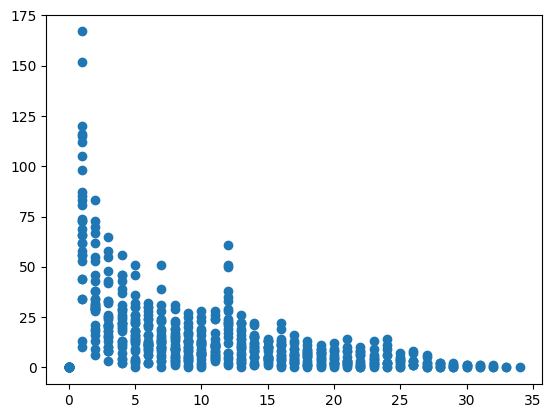

In [33]:
plt.plot(df['n lapses'],'o')

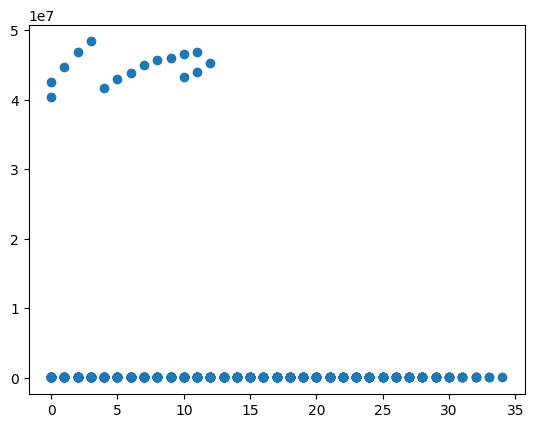

In [51]:
plt.plot(df['cohort ave income'],'o')

In [34]:
X = df.drop(columns=['n lapses'])
y=df['n lapses']

In [35]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = HistGradientBoostingRegressor().fit(X_train, y_train)

In [36]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

11949607483691.979

In [47]:
df

,months after inception,n lapses,cohort ave age,lapse ave age,Matric + 3 year Diploma lapses,Matric lapses,4 year Degree lapses,No Matric lapses,Matric + certificate lapses,Matric + 4 year Diploma lapses,...,sec4 lapses,cohort ave benefit,lapse ave benefit,cohort ave cover,lapse ave cover,cohort ave premium,lapse ave premium,delayed start lapses,cohort ave calls contacted,lapse ave calls contacted
0,0,0,36.384615,0.000000,0,0,0,0,0,0,...,0,1.146678e+06,0.000000e+00,727957.682622,0.000000e+00,537.935962,0.000000,0,2.269231,0.000000
1,1,10,35.666667,39.400000,2,4,2,0,0,1,...,1,1.241125e+06,7.500000e+05,789713.480072,4.685833e+05,559.066190,449.189000,0,2.547619,1.100000
2,2,6,36.694444,29.500000,2,2,1,0,1,0,...,1,1.317424e+06,7.833333e+05,812119.430454,6.552778e+05,595.127500,342.698333,0,2.750000,1.333333
3,3,3,36.326531,37.333333,1,1,0,1,0,0,...,0,1.135250e+06,1.333333e+06,695485.704007,1.258333e+06,531.996939,634.940000,0,2.306122,1.666667
4,4,2,36.319149,36.500000,0,1,0,0,0,1,...,0,1.141005e+06,1.000000e+06,692634.031837,7.625000e+05,533.839362,488.700000,0,2.340426,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,56,40.722380,40.660714,4,27,5,3,8,8,...,7,1.107536e+06,1.014286e+06,743613.582126,6.240226e+05,544.546119,538.918036,0,2.192635,1.196429
2,2,19,40.958084,36.578947,2,12,1,2,1,1,...,2,1.123982e+06,8.184211e+05,747064.369019,6.829524e+05,551.405749,423.961053,0,2.251497,1.157895
3,3,8,41.153374,33.000000,0,5,1,2,0,0,...,1,1.134080e+06,7.125000e+05,758126.787072,2.962708e+05,554.887577,409.521250,0,2.263804,1.750000
4,4,4,41.189441,38.250000,0,1,1,0,1,0,...,0,1.133882e+06,1.150000e+06,753258.796850,1.150000e+06,556.807422,400.340000,0,2.263975,2.250000


In [45]:
pd.DataFrame({'month after lapse':y_test.index,'prediction':y_pred,'true lapses':y_test})

,month after lapse,prediction,true lapses
24,24,10.452923,11
11,11,10.247766,10
12,12,22.380947,21
1,1,63.256879,56
30,30,1.247069,1
...,...,...,...
2,2,81.853972,67
12,12,29.539359,29
26,26,1.327830,1
11,11,4.146669,4


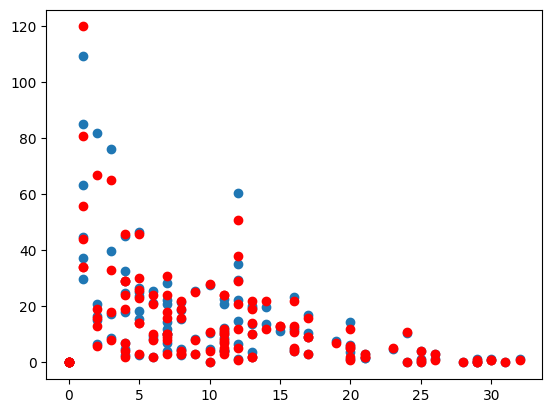

In [44]:
plt.plot(y_test.index,y_pred,'o')
plt.plot(y_test,'o',color='red')
plt.show()